In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import numpy as np 
from statsmodels.graphics.regressionplots import influence_plot
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
startups_50=pd.read_csv('50_Startups.csv')
startups_50 

,RDS,AD,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
#NEW FACTORIZED COLUMN
startups_50['State']= startups_50.State.factorize()[0]

In [5]:
startups_50['State']

0     0
1     1
2     2
3     0
4     2
5     0
6     1
7     2
8     0
9     1
10    2
11    1
12    2
13    1
14    2
15    0
16    1
17    0
18    2
19    0
20    1
21    0
22    2
23    2
24    0
25    1
26    2
27    0
28    2
29    0
30    2
31    0
32    1
33    2
34    1
35    0
36    2
37    1
38    0
39    1
40    1
41    2
42    1
43    0
44    1
45    0
46    2
47    1
48    0
49    1
Name: State, dtype: int64

In [6]:
startups_50

,RDS,AD,MKS,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [7]:
startups_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   AD      50 non-null     float64
 2   MKS     50 non-null     float64
 3   State   50 non-null     int64  
 4   Profit  50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [8]:
startups_50.isna().sum()

RDS       0
AD        0
MKS       0
State     0
Profit    0
dtype: int64

In [9]:
startups_50.corr()

,RDS,AD,MKS,State,Profit
RDS,1.000000,0.241955,0.724248,0.037930,0.972900
AD,0.241955,1.000000,-0.032154,0.003026,0.200717
MKS,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


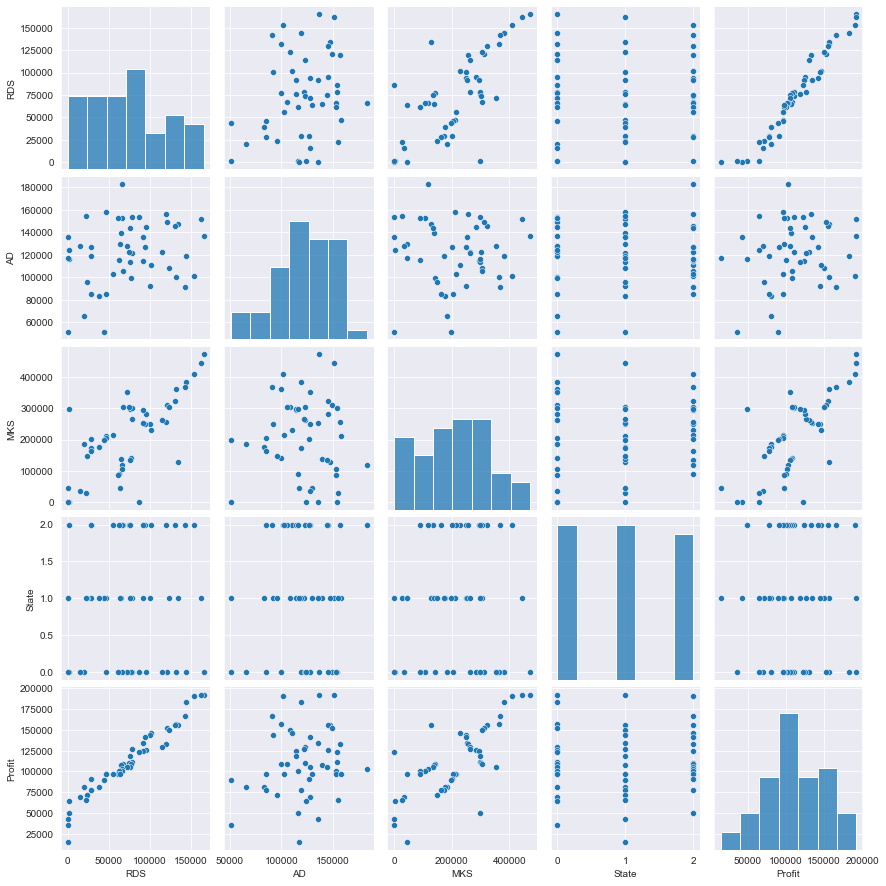

In [10]:
#Format the plot background[darkgrid] & scatterplot for all variables
sns.set_style(style='darkgrid')
sns.pairplot(startups_50) 

In [11]:
#Preparing a model
#First bulid model including all independent variables with dependent variables(continuous) for checking which variable whether significant or insignificant for prediction
model=smf.ols('Profit~RDS+AD+MKS+State',data=startups_50).fit()
model 

In [12]:
#Check R_Squared value & probability values of all variables
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 26 May 2022   Prob (F-statistic):           8.49e-29
Time:                        07:12:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.004e+04   6731.481      7.434      0.000    3.65e+04    6.36e+04
RDS            0.8060      0.046     17.569      0.000       0.714       0.898
AD            -0.0270      0.052     -0.523      0.604      -0.131       0.077
MKS            0.0270      0.017      1.602      0.116      -0.007       0.061
State        118.5147   1649.478      0.072      0.943   -3203.704    3440.733
==============================================================================
Omnibus:                       14.842   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.489
Skew:                          -0.948   Prob(JB):                     2.16e-05
Kurtosis:                       5.592   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Simple linear regression model

In [14]:
ml_State=smf.ols('Profit~State',data=startups_50).fit()
ml_State 

In [15]:
ml_State.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1130
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.738
Time:                        07:12:16   Log-Likelihood:                -600.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.097e+05   9015.098     12.166      0.000    9.16e+04    1.28e+05
State       2381.3657   7082.930      0.336      0.738   -1.19e+04    1.66e+04
==============================================================================
Omnibus:                        0.034   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.064
Skew:                           0.036   Prob(JB):                        0.968
Kurtosis:                       2.840   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ml_AD=smf.ols('Profit~AD',data=startups_50).fit()
ml_AD 

In [17]:
ml_AD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.162
Time:                        07:12:16   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ml_MKS=smf.ols('Profit~MKS',data=startups_50).fit()
ml_MKS 

In [19]:
ml_MKS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.38e-10
Time:                        07:12:17   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_StADMKS=smf.ols('Profit~State+AD+MKS',data=startups_50).fit()
ml_StADMKS 

In [21]:
ml_StADMKS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     24.28
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.44e-09
Time:                        07:12:17   Log-Likelihood:                -576.93
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1169.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.236e+04   1.81e+04      1.232      0.224   -1.42e+04    5.89e+04
State      -2816.2716   4550.142     -0.619      0.539    -1.2e+04    6342.690
AD             0.3243      0.132      2.456      0.018       0.059       0.590
MKS            0.2515      0.031      8.233      0.000       0.190       0.313
==============================================================================
Omnibus:                        5.635   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.178
Skew:                          -0.462   Prob(JB):                       0.0751
Kurtosis:                       4.277   Cond. No.                     1.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ml_RDSAD=smf.ols(('Profit~RDS+AD'),data=startups_50).fit()
ml_RDSAD  

In [23]:
ml_RDSAD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 26 May 2022   Prob (F-statistic):           7.29e-31
Time:                        07:12:17   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RDS            0.8621      0.030     28.589      0.000       0.801       0.923
AD            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
ml_RDSMKS=smf.ols(('Profit~RDS+MKS'),data=startups_50).fit()
ml_RDSMKS 

In [25]:
ml_RDSMKS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.16e-31
Time:                        07:12:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MKS            0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
ml_RDSADMKS=smf.ols(('Profit~RDS+AD+MKS'),data=startups_50).fit()
ml_RDSADMKS  

In [27]:
ml_RDSADMKS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.53e-30
Time:                        07:12:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Cal. Variance Influation Factor(VIF) of all independent variables

In [29]:
#STATE
rsq_State=smf.ols('Profit~RDS+AD+MKS',data=startups_50).fit().rsquared
vif_State=1/(1-rsq_State)
#R&D SPEND
rsq_RDS=smf.ols('Profit~State+AD+MKS',data=startups_50).fit().rsquared
vif_RDS=1/(1-rsq_RDS)
#ADMINISTRATION
rsq_AD=smf.ols('Profit~RDS+State+MKS',data=startups_50).fit().rsquared
vif_AD=1/(1-rsq_AD)
#MARKETING SPEND
rsq_MKS=smf.ols('Profit~RDS+AD+State',data=startups_50).fit().rsquared
vif_MKS=1/(1-rsq_MKS)
 
#Storing VIF values in a data frame    
d1={'Variables':['State','RDS','AD','MKS'],'VIF':[vif_State,vif_RDS,vif_AD,vif_MKS]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,State,20.302917
1,RDS,2.583621
2,AD,20.182776
3,MKS,19.209264


In [30]:
#Residual Plot
#Q-Q Plot
import statsmodels.api as sma

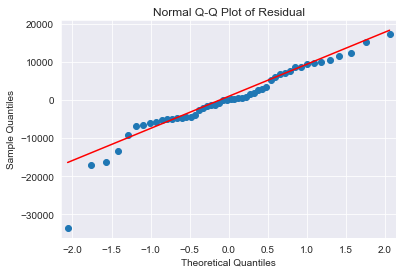

In [31]:
qqplot=sma.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residual")
plt.show()

In [32]:
#Residual Plot for HOMOSCEDASTICITY

In [33]:
#Standardized the data(Z-Score) before plotting Residual plot
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

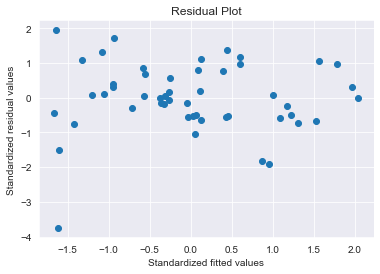

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show() 

In [35]:
#Residual Vs Regressors

eval_env: 1


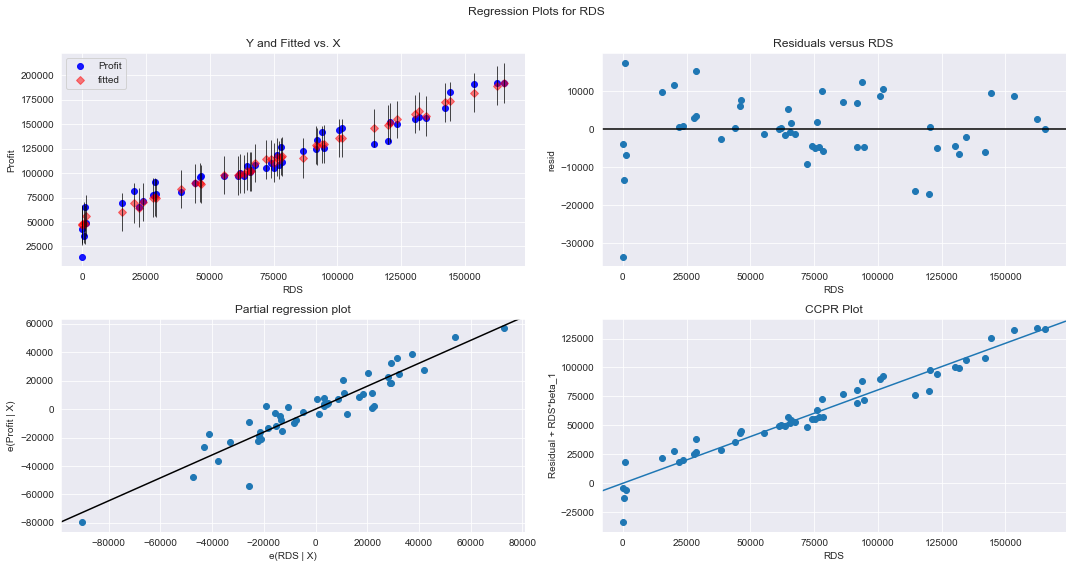

In [36]:
#R&D SPEND
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show() 

eval_env: 1


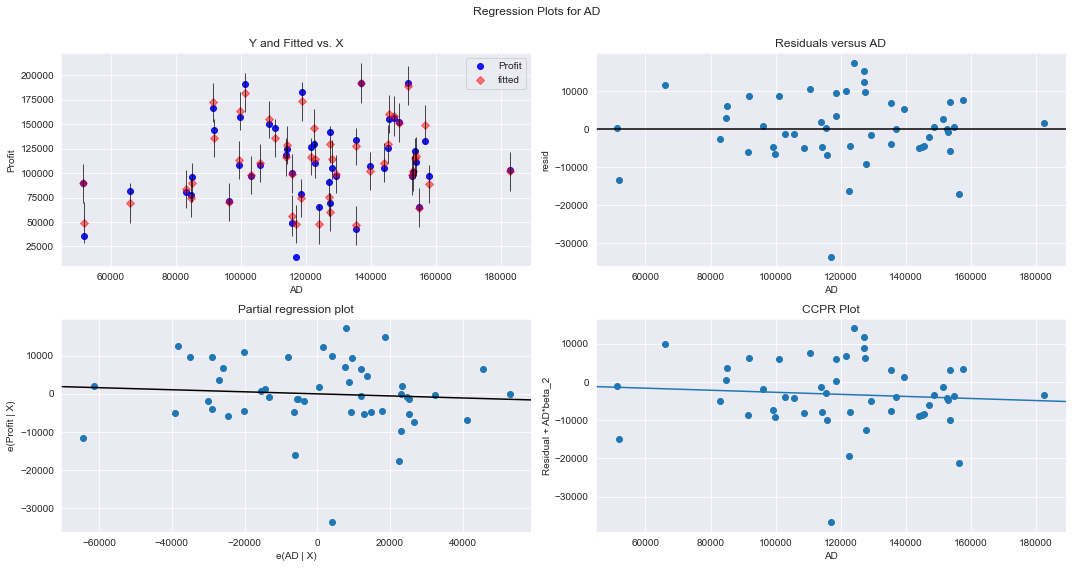

In [37]:
#ADMINISTRATION
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model,"AD",fig=fig)
plt.show()

eval_env: 1


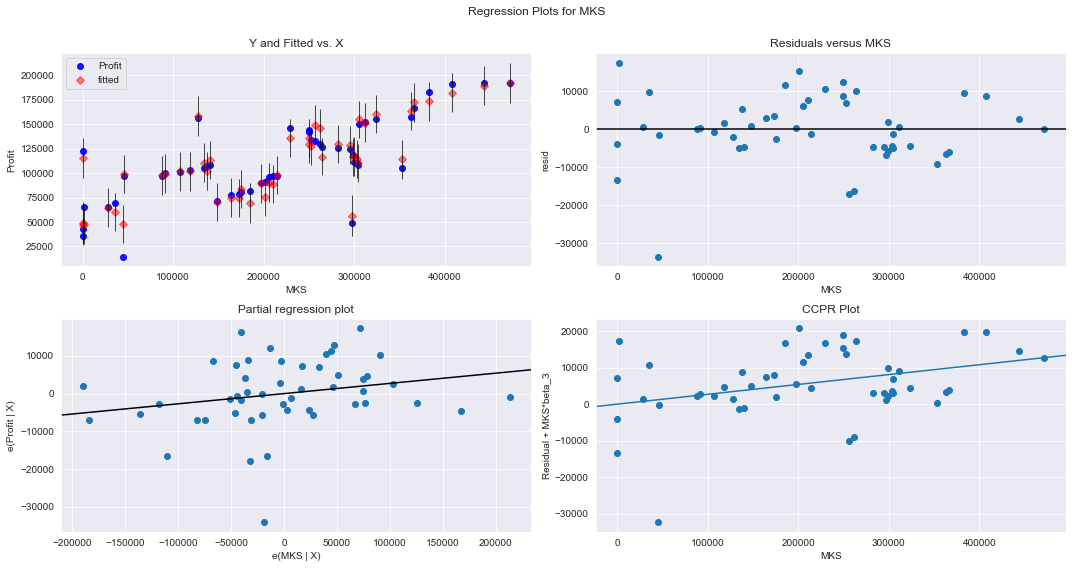

In [38]:
#MARKETING SPEND
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model,"MKS",fig=fig)
plt.show()

eval_env: 1


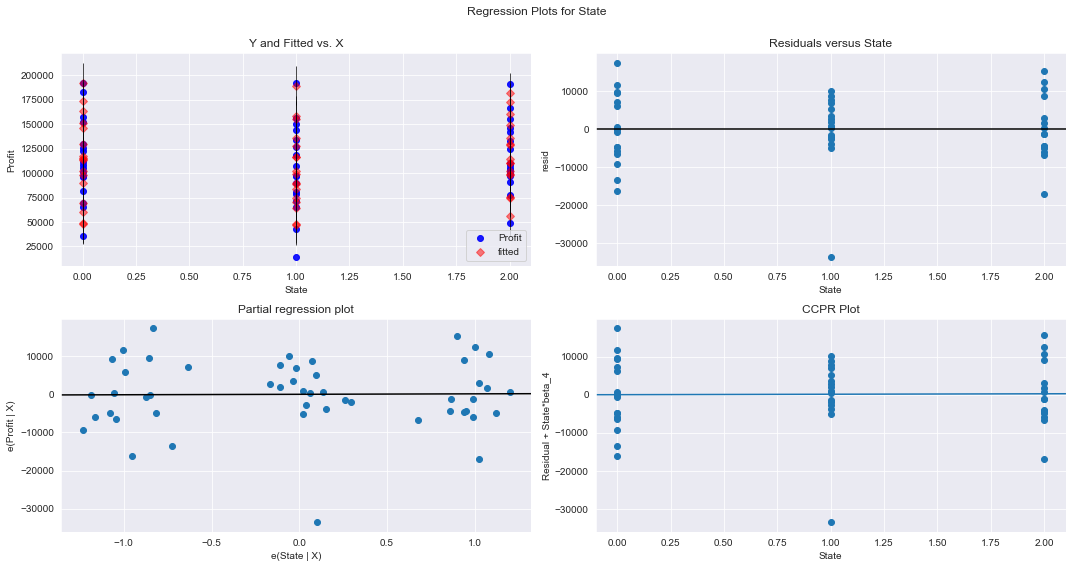

In [39]:
#State
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model,"State",fig=fig)
plt.show()

In [40]:
#MODEL DELETION DIAGNOSTICS

In [41]:
#COOK'S DISTANCE
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

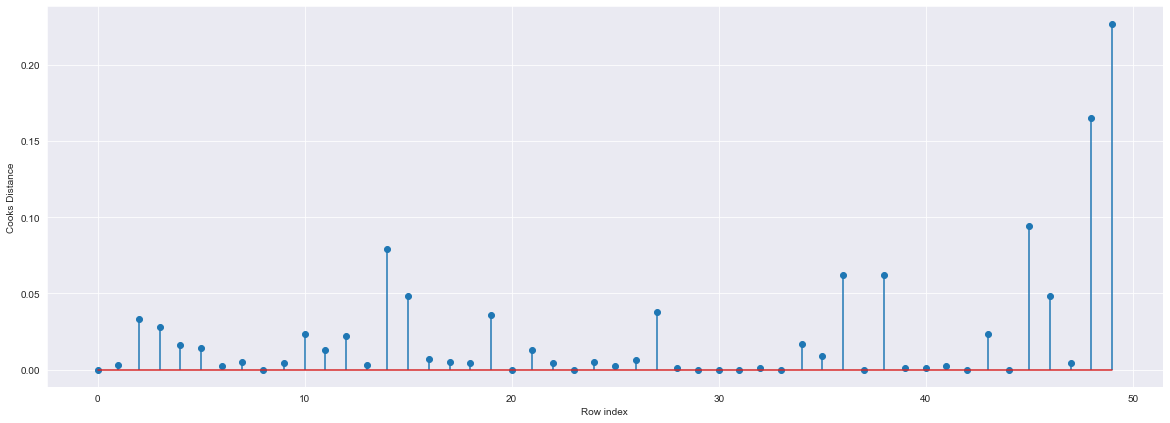

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_50)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer 
(np.argmax(c),np.max(c))

(49, 0.2267529705367535)

In [44]:
#HIGH INFLUENCE POINTS

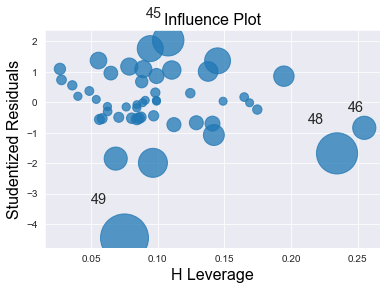

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = startups_50.shape[1]
n = startups_50.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

In [ ]:
#We got High Influence Point= 0.36 so we did not drop any observations because of no any one observation lying beyound 0.36

In [47]:
#BUILD A MODEL
#Generate R-squared & AIC values for AD,MKS & State 
#Whichever independent variables having high R-squared value & lower AIC value then inculde it.

In [48]:
final_ml_AD=smf.ols('Profit~RDS+MKS+State',data=startups_50).fit()
(final_ml_AD.rsquared,final_ml_AD.aic)

(0.950452802390498, 1059.0682485663424)

In [49]:
final_ml_MKS=smf.ols('Profit~RDS+AD+State',data=startups_50).fit()
(final_ml_MKS.rsquared,final_ml_MKS.aic)

(0.947941786035003, 1061.5400930353903)

In [50]:
final_ml_State=smf.ols('Profit~RDS+AD+MKS',data=startups_50).fit()
(final_ml_State.rsquared,final_ml_State.aic)

(0.9507459940683246, 1058.7714985998055)

In [51]:
#Cooks distance

In [52]:
model_influence_State=final_ml_State.get_influence()
(c_State,_)=model_influence_State.cooks_distance 

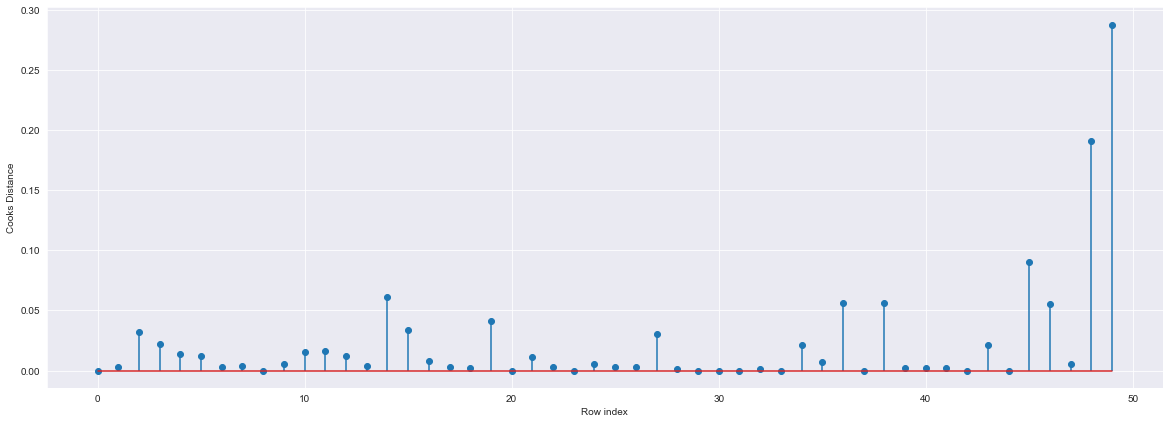

In [53]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_State,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [57]:
#index of the data points where c is more than 0.36
(np.argmax(c_State),np.max(c_State))

(49, 0.28808229275432584)

In [58]:
#Build a model for making predition of profit by including [State] variable based on its (final_ml_State) R-squared value & AIC Value
model1 = smf.ols('Profit~RDS+State',data=startups_50).fit()
model1 

In [59]:
#This model is giving 94.66% accuracy which is lesser than model[R-squared=95.10%] for making prediction  
(model1.rsquared,model1.aic)

(0.9466693579811024, 1060.7475166059194)

In [60]:
#Final model
model=smf.ols('Profit~RDS+AD+MKS+State',data=startups_50).fit()
model 

In [61]:
#Prediction for Profit
pred_Profit = model.predict(pd.DataFrame(startups_50.iloc[:,:]))
pred_Profit 

0     192380.477771
1     189136.731968
2     182258.545301
3     173569.895741
4     172257.083956
5     163457.130999
6     158149.162521
7     160134.250568
8     151616.227242
9     154886.846735
10    135637.496797
11    135582.333295
12    129256.817403
13    127485.647160
14    149669.769362
15    146122.189776
16    116908.417877
17    130064.809456
18    129125.447210
19    115560.339696
20    116626.500109
21    117181.435851
22    114809.109211
23    110099.207783
24    113265.906047
25    102248.682241
26    110733.611626
27    114261.619592
28    101786.580576
29    101691.646355
30     99594.484311
31     97586.897215
32     99032.153665
33     98032.209476
34     89026.357638
35     90393.526704
36     75393.035416
37     89626.819090
38     69578.100408
39     83733.469461
40     74811.496981
41     74923.794143
42     70623.070910
43     60065.799359
44     64627.614649
45     47551.897642
46     56246.514361
47     46508.472253
48     49085.257650
49     48227.068437
